# 화재발생여부를 예측하는 것이 목적
- binary classification

## 데이터 설명
- id    아이디(분석에 미사용)
- dt_of_fr    화재발생일시
- fr_yn    화재발생여부
- bldng_us    건물용도
- bldng_archtctr    건물구조
- bldng_cnt    건물채수
- bldng_ar    건물건축면적
- ttl_ar    건물연면적(건물층별합계전체 면적)
- lnd_ar    토지면적
- dt_of_arthrztn    건물승인일자
- ttl_grnd_flr    건물들의 지상 층수의 합
- ttl_dwn_fr    건물들의 지하 층수의 합
- bldng_us_clssfctn    건물용도분류명
- tmprtr    온도(c)
- prcpttn    강수량
- wnd_spd    풍속
- wnd_drctn    풍향
- hmdt    습도
- ele_engry_us_201401    전기 에너지 사용량(2014월1월)
- ele_engry_us_201812    전기 에너지 사용량(2018월12월)
- gas_engry_us_201401    가스 에너지 사용량(2014월1월)
- gas_engry_us_201812    가스 에너지 사용량(2018월12월)
- lw_13101010    복도/계단/출입구의 성능 유지여부(0~5)
- lw_13101110    옥상광장의 피난성능 유지여부(0~5)
- lw_13101210    방화문/방화셔터 등의 성능 유지여부(0~5)
- lw_13101211    방화구획 적합 여부(0~5)
- lw_13101310    경계벽 및 칸막이벽의 변경 등 방화성능 유지여부(0~5)
- lw_13101410    배연설비의 성능 유지여부(0~5)
- lw_13111010    내화구조의 성능 유지여부(0~5)
- lw_13111110    방화벽의 성능 유지여부(0~5)
- lw_13121010    외벽의 성능 유지여부(0~5)
- lw_13121011    창호의 성능 유지여부(0~5)
- lw_13131010    내부마감의 방화성능 유지여부(0~5)
- lw_13131110    외부마감의 노후화 및 마감재 탈락 여부(0~5)
- lw_13141010    지하층의 소방설비 성능 유지여부(0~5)
- lw_13141011    지하층 피난구/피난계단의 성능 유지여부(0~5)
- jmk    지적상 지목
- rgnl_ar_nm    용도지역지구명
- rgnl_ar_nm2    용도지역지구명2
- lnd_us_sttn_nm    토지이용상황명
- rd_sd_nm    도로측면명
- emd_nm    행정구역명
- hm_cnt    행정구역 인구
- fr_sttn_dstnc    119 안전센터와의 거리
- bldng_ar_prc    단위 면적당 건물 가격(2019년)
- fr_wthr_fclt_dstnc    소방용수시설(소화전 등)과의 최소 거리
- fr_mn_cnt    관할 소방서 인원
- mlt_us_yn    다중이용시설 포함여부
- cctv_dstnc    공공 CCTV와의 최소 거리
- cctv_in_100m    반경 100m 이내 공공 CCTV
- fr_wthr_fclt_in_100m    반경 100m 이내 소방용수 시설 수
- tbc_rtl_str_dstnc    담배 소매점과의 최소 거리
- sft_emrgnc_bll_dstnc    안전 비상벨과의 최소 거리
- ahsm_dstnc    자동 심장 충격기와의 최소 거리
- no_tbc_zn_dstnc    금연구역과의 최소 거리
- trgt_crtr    소방관리대상물기준
- fr_fghtng_fclt_spcl_css_5_yn    소방시설특례5호여부
- fr_fghtng_fclt_spcl_css_6_yn    소방시설특례6호여부
- us_yn    사용여부
- dngrs_thng_yn    위험물대상여부
- slf_fr_brgd_yn    자체소방대여부
- blk_dngrs_thng_mnfctr_yn    대량위험물제조소등여부
- cltrl_hrtg_yn    문화재여부

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime as dt
from collections import Counter

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rc('font', size=12)

In [3]:
DATA_DIR = './data'
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

TRAIN_PATH = os.path.join(DATA_DIR, TRAIN_DATA)
TEST_PATH = os.path.join(DATA_DIR, TEST_DATA)

In [4]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df = pd.concat([df_train, df_test])

df = df.reset_index(drop=True)

# Train Data 와 Test Data 의 개수
number_of_train_data = df_train.shape[0]
number_of_test_data = df_test.shape[0]

df.rename(columns={"id":"아이디",
  "dt_of_fr": "화재발생일시",
  "bldng_us":"건물용도",
  "bldng_archtctr":"건물구조",
  "bldng_cnt":"건물채수",
  "bldng_ar":"건물건축면적",
  "ttl_ar":"건물층별합계전체면적",
  "lnd_ar":"토지면적" ,
  "dt_of_athrztn":"건물승인일자" ,
  "ttl_grnd_flr":"건물들지상층수합" ,
  "ttl_dwn_flr":"건물들지하층수합",
  "bldng_us_clssfctn":"건물용도분류명",
  "prcpttn": "강수량",
  "tmprtr":"온도",
  "wnd_spd":"풍속" ,
   "wnd_drctn":"풍향",
  "hmdt":"습도",
  "jmk":"지적상지목",
   "rgnl_ar_nm":"용도지역지구명",
  "rgnl_ar_nm2":"용도지역지구명2",
  "lnd_us_sttn_nm":"토지이용상황명",
   "rd_sd_nm":"도로측면명",
   "emd_nm":"행정구역명",
   "hm_cnt":"행정구역인구",
   "fr_sttn_dstnc":"소방서거리",
   "bldng_ar_prc":"건물면적당가격",
   "fr_wthr_fclt_dstnc":"소방용수시설거리",
   "fr_mn_cnt":"관할소방서인원",
   "mlt_us_yn":"다중이용시설여부",
   "cctv_dstnc":"공공CCTV거리",
   "cctv_in_100m":"백미터이내CCTV수",
   "fr_wthr_fclt_in_100m":"백미터이내소방용수시설수",
   "tbc_rtl_str_dstnc":"담배소매점거리",
   "sft_emrgnc_bll_dstnc":"안전비상벨최소거리",
   "ahsm_dstnc":"자동심장충격기거리",
   "no_tbc_zn_dstnc":"금연구역최소거리",
   "bldng_cnt_in_50m":"반경50m건물수",
   "fr_yn":"화재발생",
   "trgt_crtr":"소방점검대상물기준",
   "fr_fghtng_fclt_spcl_css_5_yn":"소방시설특례5호여부",
   "fr_fghtng_fclt_spcl_css_6_yn":"소방시설특례6호여부",
   "us_yn":"사용여부",
   "dngrs_thng_yn":"위험물대상여부",
   "slf_fr_brgd_yn":"자체소방대여부",
   "blk_dngrs_thng_mnfctr_yn":"대량위험물제조소등여부",
   "cltrl_hrtg_yn":"문화재여부"}, inplace=True)

y_train = df_train["fr_yn"]
y_train_onehot = pd.get_dummies(df_train[["fr_yn"]])

# df = df.drop('화재발생', axis=1)

C:\Users\zxwlg\miniconda3\envs\Data_Science\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 데이터 전처리
## 화재발생일시 시간 전처리

In [5]:
date_time = [i.split(" ") for i in df["화재발생일시"].tolist()]
# 날짜,시간 만들기
date = []
time = []
for i in date_time:
    date.append(i[0])
    time.append(i[1])

date = [dt.datetime.strptime(char, "%Y-%m-%d") for char in date]
time = [int(char[0:2]) for char in time]

df["날짜"] = date
df["시간"] = time

# 년, 월 만들기
df['월'] =[month.month for month in date]
df['년도'] = [year.year for year in date]

# 계절 만들기
spring = [3,4,5]; summer = [6,7,8]; fall = [9,10]; winter = [10,11,1,2]
season = ['봄' if i in spring else '여름' if i in summer else '가을' if i in fall else '겨울' for i in df['월']]
df['계절'] = season

# 24시간 새벽,오전오후,저녁으로 나누기
seperate_four = []
for season, time in zip(df['계절'], df['시간']):
    if season == '겨울' and time >= 0 and time <= 8:
        seperate_four.append('새벽')
    elif season == '겨울' and time > 8 and time <= 12:
        seperate_four.append('오전')
    elif season == '겨울' and time > 12 and time < 18:
        seperate_four.append('오후')
    elif season == '겨울' and time >= 18 and time <= 23:
        seperate_four.append('저녁')    
    elif season == '봄' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '봄' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '봄' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '봄' and time >= 19 and time <= 23:
        seperate_four.append('저녁')
    elif season == '여름' and time >= 0 and time <= 6:
        seperate_four.append('새벽')
    elif season == '여름' and time > 6 and time <= 12:
        seperate_four.append('오전')
    elif season == '여름' and time > 12 and time < 20:
        seperate_four.append('오후')
    elif season == '여름' and time >= 20 and time <= 23:
        seperate_four.append('저녁')
    elif season == '가을' and time >= 0 and time <= 7:
        seperate_four.append('새벽')
    elif season == '가을' and time > 7 and time <= 12:
        seperate_four.append('오전')
    elif season == '가을' and time > 12 and time < 19:
        seperate_four.append('오후')
    elif season == '가을' and time >= 19 and time <= 23:
        seperate_four.append('저녁')

df['하루분기'] = seperate_four

## 행정구역명 전처리

In [6]:
df["행정구역명"].unique()

array(['경상남도 통영시 용남면', '경상남도 거창군 북상면', '경상남도 통영시 한산면', '경상남도 거창군 고제면',
       '경상남도 의령군 정곡면', '경상남도 진주시 사봉면', '경상남도 통영시 도산면', '경상남도 진주시 지수면',
       '경상남도 진주시 성북동', '경상남도 거창군 주상면', '경상남도 밀양시 삼랑진읍', '경상남도 거제시 고현동',
       '경상남도 창원시진해구 풍호동', '경상남도 통영시 광도면', '경상남도 통영시 봉평동',
       '경상남도 창원시진해구 여좌동', '경상남도 통영시 도천동', '경상남도 밀양시 삼문동', '경상남도 통영시 산양읍',
       '경상남도 밀양시 산내면', '경상남도 밀양시 하남읍', '경상남도 밀양시 산외면', '경상남도 밀양시 상남면',
       '경상남도 밀양시 교동', '경상남도 밀양시 가곡동', '경상남도 밀양시 무안면', '경상남도 밀양시 청도면',
       '경상남도 밀양시 단장면', '경상남도 밀양시 상동면', '경상남도 통영시 북신동', '경상남도 거창군 신원면',
       '경상남도 통영시 중앙동', '경상남도 거제시 연초면', '경상남도 밀양시 초동면', '경상남도 거제시 옥포2동',
       '경상남도 거제시 둔덕면', '경상남도 사천시 사남면', '경상남도 거창군 거창읍', '경상남도 통영시 명정동',
       '경상남도 거제시 동부면', '경상남도 합천군 율곡면', '경상남도 밀양시 부북면', '경상남도 밀양시 내이동',
       '경상남도 통영시 욕지면', '경상남도 거제시 거제면', '경상남도 창원시마산합포구 노산동',
       '경상남도 양산시 덕계동', '경상남도 진주시 진성면', '경상남도 진주시 대곡면',
       '경상남도 창원시마산합포구 교방동', '경상남도 창녕군 길곡면', '경상남도 하동군 북천면',
       '경상남도 창원시마산합포구 자산동', '경상남도 남해군 이동면', '경상남도 창녕군

In [7]:
df["행정구역명"].isnull().sum()

4

In [8]:
df_test["emd_nm"].isnull().sum()

0

- 행정구역명의 NA 값은 train data 에만 4개 존재하므로 데이터 자체를 삭제

In [9]:
df = df.drop(np.where(df["행정구역명"].isnull())[0])
df = df.reset_index(drop=True)

In [10]:
number_of_train_data -= 4
y_train = df["화재발생"]
y_train_onehot = pd.get_dummies(df[["화재발생"]])

In [11]:
df["시군구"] = df["행정구역명"].str.replace("경상남도", "").map(lambda x: x[1:4])

## 결측치 확인

In [12]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
lw_13121011,58922,0.995388
lw_13121010,58922,0.995388
lw_13111110,58914,0.995253
lw_13101410,58912,0.995219
lw_13101110,58904,0.995084
lw_13141011,58904,0.995084
lw_13101310,58903,0.995067
lw_13141010,58903,0.995067
lw_13131010,58899,0.995000
lw_13131110,58899,0.995000


In [13]:
missing_data[missing_data["Percent"] > 0.9].index

Index(['lw_13121011', 'lw_13121010', 'lw_13111110', 'lw_13101410',
       'lw_13101110', 'lw_13141011', 'lw_13101310', 'lw_13141010',
       'lw_13131010', 'lw_13131110', 'lw_13101210', 'lw_13101211',
       'lw_13111010', 'lw_13101010', 'gas_engry_us_201802',
       'gas_engry_us_201603', 'gas_engry_us_201712', 'gas_engry_us_201602',
       'gas_engry_us_201601', 'gas_engry_us_201801', 'gas_engry_us_201512',
       'gas_engry_us_201511', 'gas_engry_us_201701', 'gas_engry_us_201510',
       'gas_engry_us_201509', 'gas_engry_us_201803', 'gas_engry_us_201508',
       'gas_engry_us_201507', 'gas_engry_us_201711', 'gas_engry_us_201804',
       'gas_engry_us_201604', 'gas_engry_us_201610', 'gas_engry_us_201605',
       'gas_engry_us_201611', 'gas_engry_us_201705', 'gas_engry_us_201703',
       'gas_engry_us_201702', 'gas_engry_us_201706', 'gas_engry_us_201707',
       'gas_engry_us_201612', 'gas_engry_us_201708', 'gas_engry_us_201606',
       'gas_engry_us_201505', 'gas_engry_us_201609', 'g

- lw 와 gas , 강수량 특성들은 결측치가 90퍼센트가 넘어간다.

In [14]:
df["lw_13121011"].unique()

array([       nan, 0.        , 4.        , 3.        , 2.        ,
       2.73684211, 3.05882353, 2.05263158, 1.85714286, 3.46666667,
       2.28571429, 1.8       , 3.25      , 2.4       , 3.59090909,
       1.94117647])

In [15]:
temp_df = pd.DataFrame(df["lw_13121011"].fillna(0))
temp_df = pd.merge(temp_df, y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

,lw_13121011,화재발생_N,화재발생_Y
lw_13121011,1.000000,-0.021743,0.012790
화재발생_N,-0.021743,1.000000,-0.825976
화재발생_Y,0.012790,-0.825976,1.000000


In [16]:
df["gas_engry_us_201603"].unique()

array([nan,  0.])

- 가스 에너지 사용량인데 0밖에 없다?

In [17]:
temp_df = pd.DataFrame(df["gas_engry_us_201603"].fillna("NA"))
temp_df = pd.merge(pd.get_dummies(temp_df[["gas_engry_us_201603"]]), y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

,gas_engry_us_201603_0.0,gas_engry_us_201603_NA,화재발생_N,화재발생_Y
gas_engry_us_201603_0.0,1.000000,-1.000000,-0.095216,0.060437
gas_engry_us_201603_NA,-1.000000,1.000000,0.095216,-0.060437
화재발생_N,-0.095216,0.095216,1.000000,-0.825976
화재발생_Y,0.060437,-0.060437,-0.825976,1.000000


In [18]:
df["강수량"].unique()

array([ nan,  0.5,  0.4,  0.8,  0.6,  6.4,  2. ,  0. , 25. ,  0.7,  1.5,
        3.6,  5. ,  1. ,  1.2,  0.2,  0.3,  7. ,  2.9,  6.8,  3. ,  1.8,
        0.1,  2.5,  1.1, 11.2,  2.3,  3.1,  4.5,  8.2,  1.4,  3.7,  1.9,
        8.5,  1.6,  4.1, 11.8,  7.5,  9.5,  2.2,  5.1,  1.7,  0.9,  2.1,
        6.5,  5.3,  3.5,  9.7,  1.3,  2.4, 10. , 11.5,  4.7,  4. , 11.1,
        3.4,  2.8,  3.3, 14.1, 17.7,  5.5, 14.5, 17.5, 26. , 93. ,  6. ,
        8.6, 21.5,  7.7,  8. , 13.5, 30.5, 10.4, 28.5, 13. ,  4.3, 37. ,
       15. ,  9. , 34. , 12. ,  3.2, 15.3, 10.5, 14. ,  5.4, 16. , 16.5,
       26.5, 12.5, 17.4, 18.5, 18. , 35.5, 11. ,  9.2,  6.7, 39.5, 27. ,
       11.6, 40.5, 10.8,  3.9, 24. , 43.5, 24.5, 20. , 20.5, 22. ,  6.3,
        2.6,  7.3,  4.8, 13.1,  5.9,  4.2,  5.8,  4.4,  3.8, 16.7,  4.9,
       11.3, 36.5, 15.4, 13.8, 15.8, 19.5,  2.7,  5.7,  5.6, 29. ,  6.6,
       19.9,  8.4,  4.6,  6.9,  7.8, 10.1, 12.3,  5.2, 23.9, 18.7,  7.2,
       19.7, 18.1,  6.1, 19. ,  9.3,  8.3,  6.2, 14

In [19]:
temp_df = pd.DataFrame(df["강수량"].fillna(0))
temp_df = pd.merge(temp_df, y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

,강수량,화재발생_N,화재발생_Y
강수량,1.000000,0.000896,-0.002413
화재발생_N,0.000896,1.000000,-0.825976
화재발생_Y,-0.002413,-0.825976,1.000000


- 결측치가 90퍼센트가 넘어가는 특성들은 모두 제거

In [20]:
df = df.drop(missing_data[missing_data["Percent"] > 0.9].index, axis=1)

In [21]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
ele_engry_us_201701,43548,0.73567
ele_engry_us_201707,43548,0.73567
ele_engry_us_201705,43548,0.73567
ele_engry_us_201704,43548,0.73567
ele_engry_us_201703,43548,0.73567
ele_engry_us_201702,43548,0.73567
ele_engry_us_201612,43548,0.73567
ele_engry_us_201611,43548,0.73567
ele_engry_us_201610,43548,0.73567
ele_engry_us_201609,43548,0.73567


In [22]:
df["ele_engry_us_201609"].unique()

array([nan,  0.])

- 전기 에너지 사용량인데 0밖에 없다?

In [23]:
temp_df = pd.DataFrame(df["ele_engry_us_201609"].fillna("NA"))
temp_df = pd.merge(pd.get_dummies(temp_df[["ele_engry_us_201609"]]), y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

,ele_engry_us_201609_0.0,ele_engry_us_201609_NA,화재발생_N,화재발생_Y
ele_engry_us_201609_0.0,1.000000,-1.000000,-0.144047,0.130638
ele_engry_us_201609_NA,-1.000000,1.000000,0.144047,-0.130638
화재발생_N,-0.144047,0.144047,1.000000,-0.825976
화재발생_Y,0.130638,-0.130638,-0.825976,1.000000


- 결측치가 90퍼센트 이상의 특성들보다는 상관관계가 높게 나왔지만, 전기 사용량을 의미하는 것이 NA 와 0 으로 구분되는 것은 의미 없다고 판단.

In [24]:
missing_data.head(60)

,Total,Percent
ele_engry_us_201701,43548,0.73567
ele_engry_us_201707,43548,0.73567
ele_engry_us_201705,43548,0.73567
ele_engry_us_201704,43548,0.73567
ele_engry_us_201703,43548,0.73567
ele_engry_us_201702,43548,0.73567
ele_engry_us_201612,43548,0.73567
ele_engry_us_201611,43548,0.73567
ele_engry_us_201610,43548,0.73567
ele_engry_us_201609,43548,0.73567


In [25]:
df = df.drop(missing_data.head(60).index[:], axis=1)
df_train = df_train.drop(missing_data.head(60).index[:], axis=1)

In [26]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
건물용도분류명,29341,0.495667
건물용도,27675,0.467523
건물구조,27663,0.467320
건물승인일자,27579,0.465901
건물면적당가격,21892,0.369829
건물들지하층수합,11004,0.185894
건물들지상층수합,10209,0.172464
토지이용상황명,1772,0.029935
용도지역지구명,1487,0.025120
도로측면명,1487,0.025120


- 범주형 데이터는 NA 범주 생성해주기

### 건물용도분류명

In [27]:
df["건물용도분류명"].unique()

array([nan, '공공용', '주거용', '상업용', '공업용', '문교사회용', '농수산용', '기타'],
      dtype=object)

In [28]:
df["건물용도분류명"] = df["건물용도분류명"].fillna("NA")

In [29]:
temp_df = pd.merge(pd.get_dummies(df[["건물용도분류명"]]), y_train_onehot, left_index=True, right_index=True)
temp_df.corr()

,건물용도분류명_NA,건물용도분류명_공공용,건물용도분류명_공업용,건물용도분류명_기타,건물용도분류명_농수산용,건물용도분류명_문교사회용,건물용도분류명_상업용,건물용도분류명_주거용,화재발생_N,화재발생_Y
건물용도분류명_NA,1.000000,-0.023585,-0.146053,-0.174196,-0.140967,-0.105424,-0.312144,-0.686851,0.342259,-0.317826
건물용도분류명_공공용,-0.023585,1.000000,-0.003689,-0.004399,-0.003560,-0.002663,-0.007883,-0.017347,-0.023984,0.024973
건물용도분류명_공업용,-0.146053,-0.003689,1.000000,-0.027244,-0.022047,-0.016488,-0.048819,-0.107423,-0.199660,0.136182
건물용도분류명_기타,-0.174196,-0.004399,-0.027244,1.000000,-0.026295,-0.019665,-0.058226,-0.128122,-0.041633,0.057782
건물용도분류명_농수산용,-0.140967,-0.003560,-0.022047,-0.026295,1.000000,-0.015914,-0.047119,-0.103682,-0.047856,0.051577
건물용도분류명_문교사회용,-0.105424,-0.002663,-0.016488,-0.019665,-0.015914,1.000000,-0.035238,-0.077540,-0.076216,0.078539
건물용도분류명_상업용,-0.312144,-0.007883,-0.048819,-0.058226,-0.047119,-0.035238,1.000000,-0.229583,-0.199439,0.194273
건물용도분류명_주거용,-0.686851,-0.017347,-0.107423,-0.128122,-0.103682,-0.077540,-0.229583,1.000000,-0.127670,0.117199
화재발생_N,0.342259,-0.023984,-0.199660,-0.041633,-0.047856,-0.076216,-0.199439,-0.127670,1.000000,-0.825976
화재발생_Y,-0.317826,0.024973,0.136182,0.057782,0.051577,0.078539,0.194273,0.117199,-0.825976,1.000000


### 건물용도

In [30]:
df["건물용도"].unique()

array([nan, '업무시설', '단독주택', '위험물저장및처리시설', '공동주택', '제1종근린생활시설', '공장',
       '제2종근린생활시설', '노유자시설', '운동시설', '동.식물 관련시설', '창고시설', '의료시설', '위락시설',
       '자동차관련시설', '종교시설', '근린생활시설', '분뇨.쓰레기처리시설', '숙박시설', '교육연구시설',
       '발전시설', '관광휴게시설', '판매시설', '수련시설', '문화및집회시설', '묘지관련시설', '방송통신시설',
       '장례식장', '운수시설', '교정및군사시설', '교육연구및복지시설', '파출소', '판매및영업시설', '시장',
       '공공용시설'], dtype=object)

In [31]:
df["건물용도"] = df["건물용도"].fillna("NA")

### 건물구조

In [32]:
df["건물구조"].unique()

array([nan, '철근콘크리트구조', '블록구조', '벽돌구조', '경량철골구조', '일반목구조', '일반철골구조',
       '기타구조', '강파이프구조', '조적구조', '석구조', '기타조적구조', '통나무구조', '철골콘크리트구조',
       '철골철근콘크리트구조', '기타강구조', '프리케스트콘크리트구조', '목구조', '기타콘크리트구조'],
      dtype=object)

In [33]:
# 목구조, 콘크리트구조, 벽돌구조, 철골구조, 조적구조 묶어주기
df['건물구조'] = ['목구조' if x in ['일반목구조','통나무구조','목구조'] else '콘크리트구조' if x in ['철근콘크리트구조','철골콘크리트구조','철골철근콘크리트구조',\
     '프리케스트콘크리트구조','기타콘크리트구조'] else '벽돌구조' if x in ['블록구조','벽돌구조'] else '철골구조' if x in ['경량철골구조', '일반철골구조'] 
     else '조적구조' if x in ['조적구조', '기타조적구조'] else x for x in df['건물구조']]

In [34]:
df['건물구조'].unique()

array([nan, '콘크리트구조', '벽돌구조', '철골구조', '목구조', '기타구조', '강파이프구조', '조적구조',
       '석구조', '기타강구조'], dtype=object)

In [35]:
df["건물구조"] = df["건물구조"].fillna("NA")

### 건물승인일자

In [36]:
df["건물승인일자"]

0               NaN
1        19881010.0
2        19650101.0
3        20020129.0
4               NaN
            ...    
62147    20160107.0
62148    19980323.0
62149    20050608.0
62150    20140502.0
62151    20130701.0
Name: 건물승인일자, Length: 62152, dtype: object

In [37]:
df["건물승인일자"] = df["건물승인일자"].fillna(9999)
# 년도만 남기기
df["건물승인일자"] = df["건물승인일자"].astype(str).map(lambda x: x[0:4])

In [38]:
np.sort(df['건물승인일자'].unique())

array(['1646', '1740', '1742', '1751', '1790', '1800', '1801', '1811',
       '1819', '1820', '1821', '1840', '1843', '1850', '1852', '1855',
       '1860', '1861', '1862', '1863', '1865', '1866', '1867', '1870',
       '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878',
       '1880', '1882', '1883', '1884', '1885', '1887', '1889', '1890',
       '1891', '1892', '1893', '1894', '1895', '1896', '1898', '1899',
       '1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907',
       '1908', '1909', '1910', '1911', '1912', '1913', '1914', '1915',
       '1916', '1917', '1918', '1919', '1920', '1921', '1922', '1923',
       '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931',
       '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939',
       '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947',
       '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
      

In [39]:
df["건물승인일자"] = df["건물승인일자"].astype(int).map(lambda x: x if x < 2020 else 0)

In [40]:
df["건물승인일자"].unique()

array([   0, 1988, 1965, 2002, 2000, 1983, 1972, 2006, 2010, 1996, 2009,
       1940, 1995, 1979, 2004, 2011, 1970, 1955, 1975, 1935, 1946, 1997,
       1999, 2007, 2008, 2012, 1993, 1978, 2005, 2003, 1945, 2015, 1981,
       2013, 2016, 1971, 1926, 1930, 1910, 1998, 1992, 1973, 1952, 1976,
       1994, 2001, 1990, 1915, 1927, 1950, 1984, 1960, 1904, 1919, 1922,
       1991, 1934, 1967, 1987, 1963, 1941, 1925, 1982, 1949, 1880, 1929,
       1958, 1986, 1957, 1974, 1924, 2018, 1977, 1969, 2014, 1968, 1985,
       1943, 1931, 1948, 1951, 1923, 1894, 1912, 1800, 1956, 1920, 1932,
       1918, 1980, 1944, 1911, 1933, 1871, 1937, 1882, 1962, 1903, 1966,
       2017, 1954, 1900, 1989, 1942, 1939, 1936, 1905, 1916, 1896, 1893,
       1890, 1901, 1961, 1914, 1964, 1908, 1938, 1870, 1959, 1866, 1875,
       1928, 1947, 1865, 1821, 1861, 1867, 1907, 1887, 1874, 1840, 1820,
       1921, 1819, 1850, 1891, 1877, 1895, 1953, 1646, 1878, 1909, 1876,
       1883, 1884, 1892, 1862, 1902, 1913, 1906, 19

In [41]:
df["건물승인일자_년대"] = df["건물승인일자"].astype(int).map(lambda x: "2000s" if x >= 2000 else "1950s" if x >= 1950 else "1900s" 
                                               if x >= 1900 else "1850s" if x >= 1850 else "1800s" if x >= 1800 else "1750s" 
                                               if x >= 1750 else "1700s" if x >= 1700 else "1600s" if x >= 1600 else "NA")

In [42]:
df["건물승인일자_년대"].unique()

array(['NA', '1950s', '2000s', '1900s', '1850s', '1800s', '1600s',
       '1700s', '1750s'], dtype=object)

### 건물면적당가격

In [43]:
df['건물면적당가격']

0         478038.0
1              NaN
2         671829.0
3              NaN
4         522466.0
           ...    
62147    1409566.0
62148          NaN
62149          NaN
62150          NaN
62151          NaN
Name: 건물면적당가격, Length: 62152, dtype: float64

<AxesSubplot:xlabel='건물면적당가격', ylabel='화재발생'>

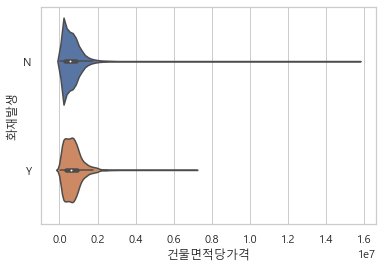

In [44]:
sns.violinplot(x='건물면적당가격', y="화재발생", data=df)

C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물면적당가격', ylabel='Density'>

C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


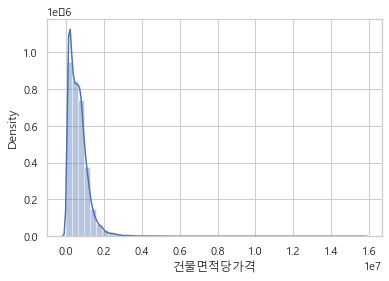

In [45]:
sns.distplot(df["건물면적당가격"], bins=50)

C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물면적당가격', ylabel='Density'>

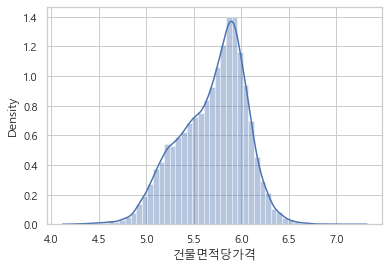

In [46]:
# log transform
temp = np.log10(df["건물면적당가격"]+0.5)
sns.distplot(temp, bins=50)

#### 행정구역명의 평균값으로 채워주기

In [47]:
df["건물면적당가격"] = df.groupby("행정구역명")["건물면적당가격"].transform(lambda x: x.fillna(x.mean()))
df["건물면적당가격"] = df["건물면적당가격"].transform(lambda x: x.fillna(x.mean()))

C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물면적당가격', ylabel='Density'>

C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


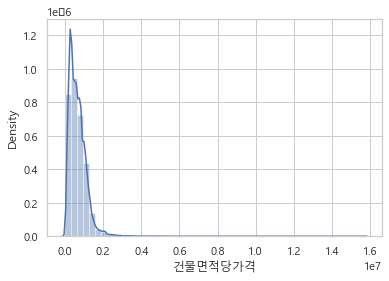

In [48]:
sns.distplot(df["건물면적당가격"], bins=50)

C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물면적당가격', ylabel='Density'>

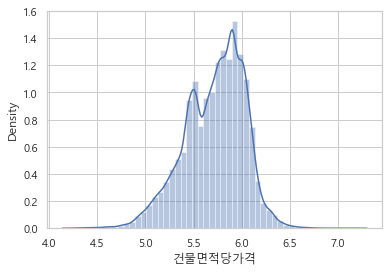

In [49]:
# log transform
temp = np.log10(df["건물면적당가격"]+0.5)
sns.distplot(temp, bins=50)

### 건물들지하층수합

In [50]:
df['건물들지하층수합'].unique()

array([ 0., nan,  6.,  1.,  3.,  9.,  4.,  5.,  2., 15., 10., 30.,  7.,
       18., 11., 14., 13., 17.,  8., 23., 33., 21., 16., 12., 42., 60.,
       48., 46., 31., 36., 20.])

<AxesSubplot:xlabel='건물들지하층수합', ylabel='화재발생'>

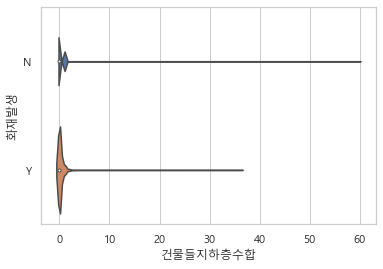

In [51]:
sns.violinplot(x='건물들지하층수합', y="화재발생", data=df)

C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물들지하층수합', ylabel='Density'>

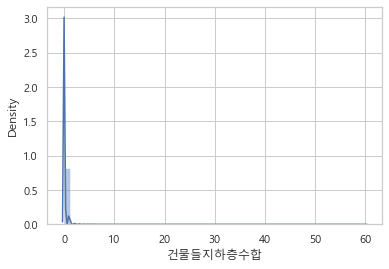

In [52]:
sns.distplot(df["건물들지하층수합"], bins=50)

In [53]:
len(df[df["건물들지하층수합"] < 10])/len(df)

0.8152754537263484

In [54]:
df['지하범주'] = ['깊지않은' if x < 10 else "깊은" if x >= 10 else "NA" for x in df['건물들지하층수합']]

### 건물들지상층수합

In [55]:
df['건물들지상층수합'].unique()

array([  1.,   5.,   2.,  nan, 200.,  15.,   3.,   4.,   6.,  10.,   7.,
         9., 131.,  95.,   8.,  16.,  62.,  91.,  17.,   0.,  33.,  13.,
        18.,  14.,  47.,  54.,  11.,  19.,  27.,  45.,  21.,  20.,  82.,
       184.,  93.,  22.,  80.,  32., 256., 351.,  48., 189., 312., 100.,
        55., 124., 182., 172., 138., 151.,  30., 533., 197., 229., 144.,
       196., 132.,  96.,  63.,  64., 270.,  78., 193.,  89., 395., 216.,
       178.,  68., 164., 139.,  24., 149.,  43.,  65.,  52., 191., 221.,
       224., 186., 163., 413.,  44., 386., 201.,  94., 143.,  69.,  26.,
        66.,  36.,  25.,  23.,  12.,  41.,  86.,  97., 103., 444., 127.,
       241., 171.,  35.,  28.,  29., 129.,  40.,  59., 126.,  39.,  75.,
       285.,  90., 102.,  88.,  60.,  72.,  51., 105.,  71.,  84., 152.,
        77., 253., 180., 118.,  31.,  81., 343.,  76.,  37., 123., 369.,
        46., 165., 183.,  92., 223., 244., 167.,  85., 133., 331., 128.,
        73.,  50., 301., 122., 125., 109.,  34., 19

<AxesSubplot:xlabel='건물들지상층수합', ylabel='화재발생'>

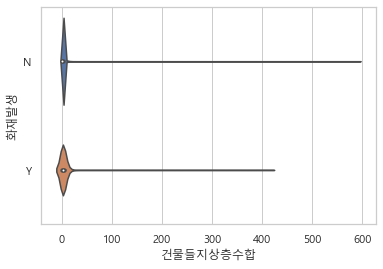

In [56]:
sns.violinplot(x='건물들지상층수합', y="화재발생", data=df)

C:\Users\zxwlg\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='건물들지상층수합', ylabel='Density'>

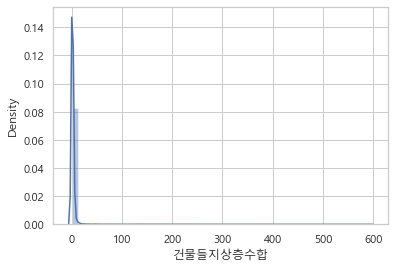

In [57]:
sns.distplot(df["건물들지상층수합"], bins=50)

In [58]:
len(df[df["건물들지상층수합"] < 15])/len(df)

0.8168844124082894

In [59]:
df['지상범주'] = ['초고층' if x >= 100 else "고층" if x >= 15 else "저층" if x < 15 else "NA" for x in df['건물들지상층수합']]

In [60]:
df = df.drop(['건물들지하층수합','건물들지상층수합'], axis=1)

In [61]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(11)

,Total,Percent
토지이용상황명,1772,0.029935
용도지역지구명,1487,0.025120
도로측면명,1487,0.025120
용도지역지구명2,1487,0.025120
행정구역인구,697,0.011775
풍향,221,0.003733
관할소방서인원,41,0.000693
풍속,33,0.000557
습도,22,0.000372
온도,13,0.000220


### 토지이용상황명, 도로측면명, 용도지역지구명

In [62]:
df['토지이용상황명'].unique()

array(['단독', '업무용', '상업용', '아파트', '주상용', '주거기타', '주거나지', '주상기타', '운동장등',
       '도로등', '전기타', '다세대', '공업용', '연립', '상업기타', '답', '과수원', '전', nan,
       '답기타', '공업기타', '자연림', '상업나지', '하천등', '공업나지', '토지임야', '주차장등',
       '임야기타', '공원등', '주상나지', '조림', '여객자동차터미널', '유해.혐오시설', '골프장 대중제',
       '기타', '골프장 회원제', '목장용지', '스키장', '공원묘지', '유원지', '고속도로휴게소', '위험시설',
       '특수기타', '발전소', '콘도미니엄'], dtype=object)

In [63]:
df['도로측면명'].unique()

array(['세로한면(불)', '중로한면', '소로한면', '세로한면(가)', '소로각지', '맹지', '세로각지(가)',
       '세로각지(불)', '중로각지', nan, '광대로한면', '광대소각', '지정되지않음', '광대세각'],
      dtype=object)

In [64]:
df['용도지역지구명'].unique()

array(['자연녹지지역', '제2종일반주거지역', '생산녹지지역', '계획관리지역', '제1종일반주거지역', '보전녹지지역',
       '자연환경보전지역', '생산관리지역', '농림지역', '보전관리지역', '준공업지역', '일반공업지역',
       '일반상업지역', nan, '중심상업지역', '제3종일반주거지역', '준주거지역', '개발제한구역',
       '제1종전용주거지역', '관리지역', '근린상업지역', '제2종전용주거지역', '용도미지정', '유통상업지역'],
      dtype=object)

In [65]:
df['용도지역지구명2'].unique()

array(['지정되지않음', '생산녹지지역', '자연녹지지역', '제2종일반주거지역', '보전녹지지역', '계획관리지역',
       '자연환경보전지역', nan, '준주거지역', '일반상업지역', '생산관리지역', '보전관리지역',
       '제1종일반주거지역', '농림지역', '제3종일반주거지역', '일반공업지역', '관리지역', '준공업지역',
       '근린상업지역', '개발제한구역'], dtype=object)

In [66]:
df = df.drop('용도지역지구명2', axis=1)

In [67]:
df['토지이용상황명'] = df.groupby(['지적상지목'])['토지이용상황명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['도로측면명'] = df.groupby(['지적상지목'])['도로측면명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['용도지역지구명'] = df.groupby(['지적상지목'])['용도지역지구명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['토지이용상황명'] = df['토지이용상황명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['도로측면명'] = df['도로측면명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['용도지역지구명'] = df['용도지역지구명'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))

### 행정구역인구

In [79]:
df['행정구역인구'] = df.groupby(["행정구역명","년도"])['행정구역인구'].transform(lambda x: x.fillna(x.mean()))
df['행정구역인구'] = df.groupby(["행정구역명"])['행정구역인구'].transform(lambda x: x.fillna(x.mean()))
df['행정구역인구'] = df.groupby(["시군구","년도"])['행정구역인구'].transform(lambda x: x.fillna(x.mean()))
df['행정구역인구'] = df.groupby(["시군구"])['행정구역인구'].transform(lambda x: x.fillna(x.mean()))

df['행정구역인구'].isnull().sum()

0

### 풍향, 풍속, 습도, 온도

In [70]:
np.sort(df["풍향"].unique())

array([  0.,   2.,  11.,  20.,  23.,  29.,  34.,  36.,  50.,  70.,  90.,
       110., 140., 160., 180., 200., 230., 250., 270., 290., 320., 340.,
       360.,  nan])

In [71]:
df['풍향'] = ['북' if x >= 315 or x < 45 else "동" if x < 135 else "남" if x < 225
            else "서" if x < 315 else np.nan for x in df['풍향']]

df['풍향'] = df.groupby(["행정구역명","날짜"])['풍향'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['풍향'] = df.groupby(["시군구","날짜"])['풍향'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['풍향'] = df.groupby(["행정구역명","년도","월"])['풍향'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))
df['풍향'] = df.groupby(["시군구","년도","월"])['풍향'].transform(lambda x: x.fillna(Counter(x).most_common(1)[0][0]))

df['풍향'].isnull().sum()

In [77]:
np.sort(df["풍속"].unique())

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.2,  9.3,  9.4,  9.6,  9.7, 10. , 10.1, 10.5,
       10.6, 10.8, 11. , 11.1, 11.2, 11.4, 11.8, 12. , 12.1, 13.9, 15.3,
        nan])

In [78]:
df['풍속'] = df.groupby(["행정구역명","날짜"])['풍속'].transform(lambda x: x.fillna(x.mean()))
df['풍속'] = df.groupby(["시군구","날짜"])['풍속'].transform(lambda x: x.fillna(x.mean()))
df['풍속'] = df.groupby(["행정구역명","년도","월"])['풍속'].transform(lambda x: x.fillna(x.mean()))

df['풍속'].isnull().sum()

0

In [80]:
np.sort(df["습도"].unique())

array([  0. ,   4. ,   5. ,   6. ,   7. ,   8. ,   9. ,  10. ,  11. ,
        12. ,  13. ,  14. ,  15. ,  16. ,  17. ,  18. ,  19. ,  20. ,
        21. ,  22. ,  23. ,  24. ,  25. ,  26. ,  27. ,  28. ,  28.9,
        29. ,  30. ,  31. ,  32. ,  33. ,  34. ,  35. ,  35.6,  36. ,
        37. ,  38. ,  39. ,  40. ,  40.7,  41. ,  42. ,  43. ,  44. ,
        45. ,  46. ,  47. ,  48. ,  49. ,  50. ,  51. ,  52. ,  53. ,
        54. ,  55. ,  56. ,  57. ,  58. ,  59. ,  60. ,  61. ,  62. ,
        63. ,  64. ,  65. ,  66. ,  67. ,  68. ,  69. ,  69.9,  70. ,
        71. ,  72. ,  73. ,  73.4,  74. ,  75. ,  76. ,  77. ,  78. ,
        79. ,  80. ,  81. ,  82. ,  83. ,  83.5,  84. ,  85. ,  86. ,
        87. ,  88. ,  89. ,  90. ,  91. ,  92. ,  93. ,  94. ,  95. ,
        96. ,  97. ,  98. ,  99. , 100. ,   nan])

In [81]:
df['습도'] = df.groupby(["행정구역명","날짜"])['습도'].transform(lambda x: x.fillna(x.mean()))
df['습도'] = df.groupby(["시군구","날짜"])['습도'].transform(lambda x: x.fillna(x.mean()))
df['습도'] = df.groupby(["행정구역명","년도","월"])['습도'].transform(lambda x: x.fillna(x.mean()))
df['습도'] = df.groupby(["시군구","년도","월"])['습도'].transform(lambda x: x.fillna(x.mean()))

df['습도'].isnull().sum()

0

In [82]:
np.sort(df["온도"].unique())

array([-14.1, -13.2, -13.1, -12.7, -12.5, -12.2, -12.1, -12. , -11.9,
       -11.8, -11.7, -11.6, -11.5, -11.4, -11.3, -11.2, -11.1, -11. ,
       -10.9, -10.8, -10.7, -10.6, -10.5, -10.4, -10.3, -10.2, -10.1,
       -10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
        -9.1,  -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,
        -8.2,  -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,
        -7.3,  -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,
        -6.4,  -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,
        -5.5,  -5.4,  -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,
        -4.6,  -4.5,  -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,
        -3.7,  -3.6,  -3.5,  -3.4,  -3.3,  -3.2,  -3.1,  -3. ,  -2.9,
        -2.8,  -2.7,  -2.6,  -2.5,  -2.4,  -2.3,  -2.2,  -2.1,  -2. ,
        -1.9,  -1.8,  -1.7,  -1.6,  -1.5,  -1.4,  -1.3,  -1.2,  -1.1,
        -1. ,  -0.9,  -0.8,  -0.7,  -0.6,  -0.5,  -0.4,  -0.3,  -0.2,
        -0.1,   0. ,

In [83]:
df['온도'] = df.groupby(["행정구역명","날짜"])['온도'].transform(lambda x: x.fillna(x.mean()))
df['온도'] = df.groupby(["시군구","날짜"])['온도'].transform(lambda x: x.fillna(x.mean()))
df['온도'] = df.groupby(["행정구역명","년도","월"])['온도'].transform(lambda x: x.fillna(x.mean()))

df['온도'].isnull().sum()

0

### 관할소방서인원

In [84]:
np.sort(df["관할소방서인원"].unique())

array([ 85., 106., 108., 109., 111., 112., 118., 121., 137., 139., 161.,
       164., 174., 176., 178., 194., 201., 205., 210.,  nan])

In [85]:
df['관할소방서인원'] = df.groupby(["행정구역명","년도"])['관할소방서인원'].transform(lambda x: x.fillna(x.mean()))
df['관할소방서인원'] = df.groupby(["행정구역명"])['관할소방서인원'].transform(lambda x: x.fillna(x.mean()))
df['관할소방서인원'] = df.groupby(["시군구","년도"])['관할소방서인원'].transform(lambda x: x.fillna(x.mean()))

df['관할소방서인원'].isnull().sum()

0

In [87]:
total = df[:number_of_train_data].isnull().sum().sort_values(ascending=False)
percent = (df[:number_of_train_data].isnull().sum()/df[:number_of_train_data].isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
아이디,0,0.0
화재발생일시,0,0.0
다중이용시설여부,0,0.0
공공CCTV거리,0,0.0
백미터이내CCTV수,0,0.0


In [88]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
화재발생,2957,0.047577
화재발생일시,0,0.000000
다중이용시설여부,0,0.000000
공공CCTV거리,0,0.000000
백미터이내CCTV수,0,0.000000
